# **Dataset 1: MNIST Original - Yann LeCun**



**Importamos el dataset y cargamos directamente los datos en train (entrenamiento) y test (prueba)**

In [27]:
import numpy as np
import struct

# --- Funciones para leer los archivos binarios ---
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(num, rows, cols)
        return data

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# --- Cargar los datos desde los archivos locales ---
x_train = load_mnist_images("train-images.idx3-ubyte")
y_train = load_mnist_labels("train-labels.idx1-ubyte")
x_test = load_mnist_images("t10k-images.idx3-ubyte")
y_test = load_mnist_labels("t10k-labels.idx1-ubyte")

# --- Igual que con Keras ---
# Convierte las imágenes 2D (28x28) en vectores 1D de 784 píxeles
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("x_train_flat:", x_train_flat.shape)
print("x_test_flat:", x_test_flat.shape)


x_train_flat: (60000, 784)
x_test_flat: (10000, 784)


**Mostrar algunas imagenes del dataset por medio de una grafica con matplot**

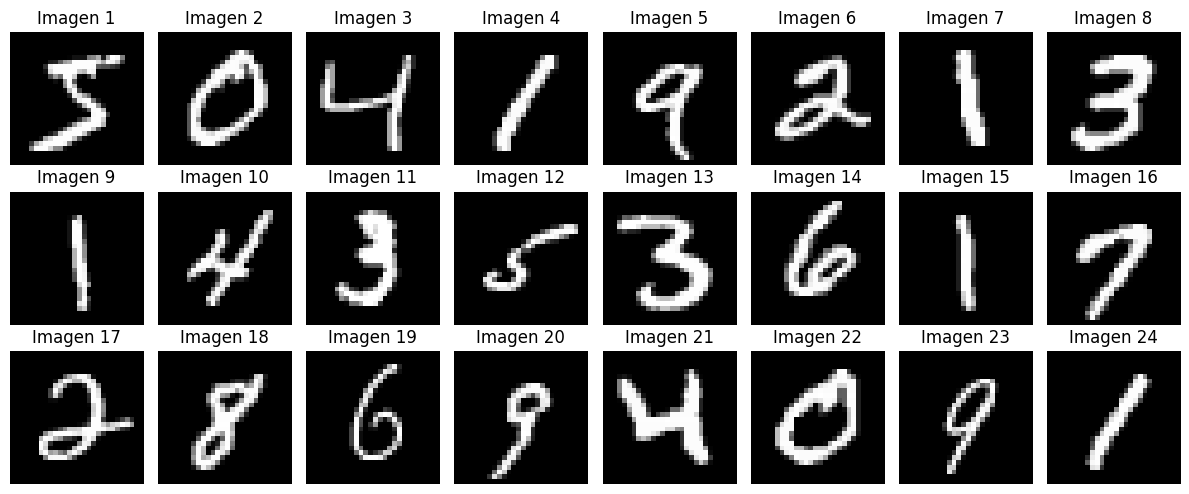

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Imagen {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Reprocesamiento**

Las redes neuronales no entienden directamente números como “0”, “1”, “2” si estos representan categorías.
La codificación one-hot soluciona eso, convirtiendo cada clase en un vector independiente donde:
Solo hay un “1” (la clase correcta).
Los demás son “0”.

In [30]:
from tensorflow.keras.utils import to_categorical

# Normalizar los valores de los píxeles al rango [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Convertir las etiquetas a codificación one-hot
# Esto transforma las clases (0–9) en vectores binarios como [0,0,0,1,0,0,0,0,0,0]
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print("🟢 Preprocesamiento completo.")

🟢 Preprocesamiento completo.


**Reestructurar los datos (Reshaping the data) y diseñar el modelo de CNN**

Antes de entrenar una red neuronal convolucional (CNN, por Convolutional Neural Network), es necesario que las imágenes tengan la forma adecuada para ser procesadas por el modelo.

En el caso del conjunto de datos MNIST, las imágenes son en escala de grises con una dimensión de 28x28 píxeles.
Sin embargo, las CNN esperan que cada imagen incluya una dimensión adicional que representa el número de canales de color.
En este caso, como las imágenes no son a color, se agrega un canal con valor 1 (ya que solo hay un canal de intensidad en escala de grises).

Una vez ajustados los datos, se procede a diseñar la arquitectura del modelo CNN, definiendo las capas convolucionales, de agrupación (pooling), y las capas densas finales para la clasificación de los dígitos (0–9).

**Conv2D:** detecta bordes, formas y patrones en las imágenes.

***MaxPooling2D:*** reduce el tamaño de las imágenes para evitar sobreajuste y disminuir el costo computacional.

**Flatten:** convierte la matriz 2D en un vector 1D para pasar a las capas densas.

**Dense:** realiza la clasificación final mediante activaciones relu y softmax.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Reestructurar los datos para incluir la dimensión del canal
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)

# Diseño del modelo de red neuronal convolucional (CNN)
modelo = Sequential([
    # Capa convolucional: detecta patrones y características de las imágenes
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Capa de agrupación (pooling): reduce la dimensionalidad y mantiene la información relevante
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional para extraer características más profundas
    Conv2D(64, (3, 3), activation='relu'),

    # Segunda capa de pooling
    MaxPooling2D((2, 2)),

    # Aplanar los datos para conectarlos con las capas densas
    Flatten(),

    # Capa densa oculta: realiza el aprendizaje de las combinaciones de características
    Dense(128, activation='relu'),

    # Capa de salida: 10 neuronas (una por cada dígito del 0 al 9)
    Dense(10, activation='softmax')
])

print("🟢 Modelo CNN diseñado correctamente.\n")
modelo.summary()


🟢 Modelo CNN diseñado correctamente.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compilar el modelo**

Una vez que se ha diseñado la arquitectura de la red neuronal convolucional (CNN), el siguiente paso es compilar el modelo.

Este proceso define cómo aprenderá la red durante el entrenamiento: qué función de pérdida utilizará, qué optimizador ajustará los pesos, y qué métricas se usarán para evaluar el rendimiento.

En este caso:


*   **Optimizador (Adam):** ajusta los pesos de la red de manera eficiente.
*   ***Función de pérdida (categorical_crossentropy):*** calcula qué tan lejos están las predicciones de las etiquetas verdaderas.
*  **Métrica (accuracy):** permite observar qué tan bien clasifica el modelo los dígitos.

In [32]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo
modelo.compile(
    optimizer=Adam(),                      # Optimizador Adam
    loss='categorical_crossentropy',       # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                   # Métrica de precisión (exactitud)
)

print("🟢 Modelo compilado correctamente.")


🟢 Modelo compilado correctamente.


**Entrenamiento del modelo**

Una vez que el modelo ha sido compilado, el siguiente paso es entrenarlo utilizando los datos de entrenamiento.

Durante este proceso, la red neuronal ajusta sus pesos internos para minimizar el error entre las predicciones y las etiquetas reales.

El entrenamiento se realiza a lo largo de varios ciclos o épocas (epochs).
En cada época, el modelo procesa todos los datos de entrenamiento y mejora progresivamente su capacidad de reconocer patrones.

En este caso:

*   **epochs=10** → el modelo verá los mismos datos 10 veces para mejorar su precisión.
*   **batch_size=32** → las imágenes se procesan en grupos pequeños para optimizar el entrenamiento.
*  **validation_split=0.2** → reserva el 20% de los datos de entrenamiento para evaluar el rendimiento durante el aprendizaje.
*   **historial** → guarda la información del proceso de entrenamiento (pérdida, precisión, validación, etc.).

In [33]:
# Entrenamiento del modelo
historial = modelo.fit(
    x_train_reshaped,          # Imágenes de entrenamiento
    y_train_one_hot,           # Etiquetas en formato one-hot
    epochs=10,                 # Número de épocas de entrenamiento
    batch_size=32,             # Tamaño del lote (número de imágenes procesadas antes de actualizar pesos)
    validation_split=0.2       # Porcentaje de datos usados para validación (20%)
)

print("🟢 Entrenamiento completado correctamente.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.9559 - loss: 0.1444 - val_accuracy: 0.9803 - val_loss: 0.0669
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9852 - loss: 0.0468 - val_accuracy: 0.9826 - val_loss: 0.0572
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9884 - val_loss: 0.0410
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9892 - val_loss: 0.0355
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9878 - val_loss: 0.0396
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9959 - loss: 0.0125 - val_accuracy: 0.9888 - val_loss: 0.0462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9898 - val_loss: 0.0417
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9970 -

**Evaluación del modelo**

Después de entrenar la red neuronal convolucional (CNN), es fundamental evaluar su rendimiento con datos que no haya visto antes, es decir, el conjunto de prueba (test set).

Este proceso permite verificar qué tan bien generaliza el modelo y si realmente aprendió a reconocer los patrones, o si solo memorizó los datos de entrenamiento (sobreajuste).

La evaluación calcula dos métricas principales:

*   **Pérdida (Loss):** mide qué tan lejos están las predicciones del modelo respecto a las etiquetas reales.
*   **Precisión (Accuracy):** indica el porcentaje de aciertos en las clasificaciones.

       .


*   **modelo.evaluate():** ejecuta el modelo sobre los datos de prueba y devuelve la pérdida y la precisión.
*   **perdida_prueba:** valores más bajos indican un mejor desempeño del modelo.
*   **precision_prueba:** muestra el porcentaje de predicciones correctas (idealmente cercano a 1 o 100%).

In [21]:
# Evaluación del modelo
perdida_prueba, precision_prueba = modelo.evaluate(
    x_test_reshaped,      # Imágenes del conjunto de prueba
    y_test_one_hot        # Etiquetas del conjunto de prueba (codificadas en one-hot)
)

print(f"\n📉 Pérdida en prueba: {perdida_prueba}")
print(f"📉 Precisión en prueba: {precision_prueba}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9884 - loss: 0.0445

📉 Pérdida en prueba: 0.04453470930457115
📉 Precisión en prueba: 0.9883999824523926


**Visualización del rendimiento del modelo**

Una vez entrenado y evaluado el modelo, es muy útil visualizar gráficamente su desempeño durante el entrenamiento.

Estas gráficas permiten observar cómo evolucionan la precisión (accuracy) y la pérdida (loss) tanto en el conjunto de entrenamiento como en el de validación a lo largo de las épocas.

Estas curvas ayudan a detectar posibles problemas como:

*   **Sobreajuste (overfitting):** cuando el modelo aprende demasiado los datos de entrenamiento y pierde capacidad de generalización.
*   **Subajuste (underfitting):** cuando el modelo no logra aprender los patrones importantes.

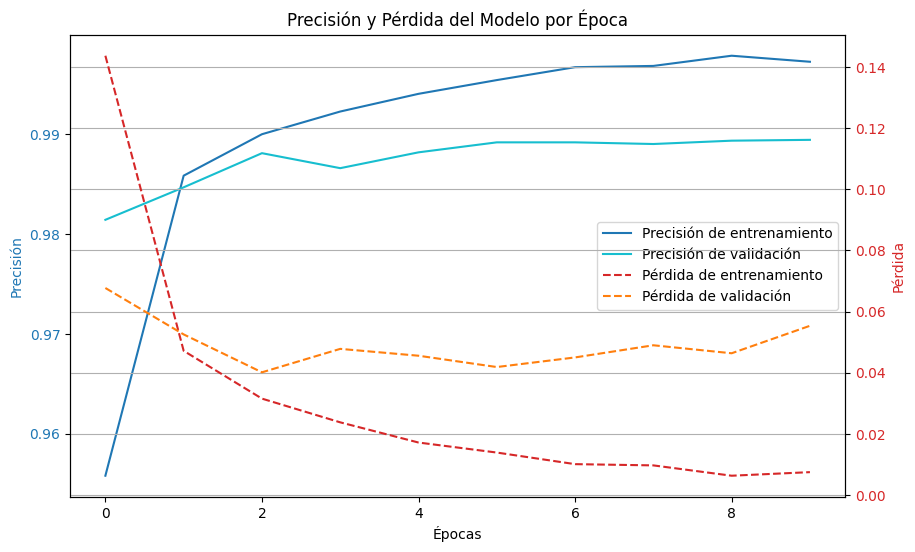

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje izquierdo: Precisión
ax1.plot(historial.history['accuracy'], color='tab:blue', label='Precisión de entrenamiento')
ax1.plot(historial.history['val_accuracy'], color='tab:cyan', label='Precisión de validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Precisión', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje derecho: Pérdida
ax2 = ax1.twinx()
ax2.plot(historial.history['loss'], color='tab:red', linestyle='--', label='Pérdida de entrenamiento')
ax2.plot(historial.history['val_loss'], color='tab:orange', linestyle='--', label='Pérdida de validación')
ax2.set_ylabel('Pérdida', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Leyendas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right')

plt.title('Precisión y Pérdida del Modelo por Época')
plt.grid(True)
plt.show()

# **Análisis de resultados**

**Evolución de la precisión**

En la primera gráfica se observa que la precisión de entrenamiento aumenta de manera constante a lo largo de las épocas, alcanzando valores cercanos al 100%.

La precisión de validación también presenta un comportamiento alto, estabilizándose alrededor del 99%, lo que indica que el modelo generaliza bien a datos que no ha visto.

Esto sugiere que la red ha aprendido correctamente las características distintivas de los dígitos del conjunto MNIST, logrando un rendimiento excelente.

**Evolución de la pérdida**

En la segunda gráfica, la pérdida de entrenamiento disminuye rápidamente durante las primeras épocas, lo que refleja un aprendizaje eficiente.

La pérdida de validación también se mantiene baja y estable, aunque muestra ligeras variaciones hacia el final, lo cual es normal cuando el modelo empieza a ajustarse más a los datos de entrenamiento.

No se evidencia un sobreajuste severo (overfitting), ya que la diferencia entre las curvas de entrenamiento y validación no es significativa.

# **Conclusión general**

El modelo CNN implementado demuestra un excelente desempeño en la tarea de clasificación de dígitos manuscritos del conjunto MNIST, alcanzando:

* Alta precisión tanto en entrenamiento como en validación.
* Baja pérdida, lo que indica un aprendizaje estable y bien optimizado.

En resumen, la arquitectura diseñada (con dos capas convolucionales, pooling y una capa densa intermedia) es adecuada y eficiente para este tipo de problema.
El modelo está bien generalizado y podría utilizarse para reconocer dígitos manuscritos con gran fiabilidad.

# **---- Exportación del modelo entrenado y predicción en una imagen personalizada ----**

In [23]:
import pickle

# Guardar el modelo entrenado en un archivo .pkl
with open('model_numbers.h5', 'wb') as file:
    pickle.dump(modelo, file)

print("🟢 Modelo exportado correctamente como 'model_numbers.h5'")

🟢 Modelo exportado correctamente como 'model_numbers.h5'


In [24]:
import pickle

# Load the model from the .pkl file
with open('model_numbers.h5', 'rb') as file:
    model = pickle.load(file)

print("🟢 Modelo cargado correctamente desde 'model_numbers.h5'")

🟢 Modelo cargado correctamente desde 'model_numbers.h5'


In [47]:
import cv2
import numpy as np

# Cargar la imagen desde una ruta local
ruta_imagen = r"C:\Users\salom\Downloads\pruebasss.png" ## Actualizar con la ruta correcta para cada uso

# Cargar la imagen en escala de grises
img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen en la ruta: {ruta_imagen}")

# Redimensionar a 28x28
img = cv2.resize(img, (28, 28))
# Invertir colores si es necesario (si el fondo es blanco)
img = cv2.bitwise_not(img)
# Normalizar a [0, 1]
img = img / 255.0
# Ajustar la forma para el modelo
img = img.reshape(1, 28, 28, 1)

print("\n🟢 Imagen cargada y procesada correctamente.\n")

# ---------------------------------------------------------------------

# Realizar la predicción

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f"\n🔢 Dígito predicho: {predicted_digit}\n")


🟢 Imagen cargada y procesada correctamente.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

🔢 Dígito predicho: 3

